# Visualizing Audio

In [3]:
import os,sys
from IPython.display import Audio

In [4]:
data_dir="C:/Users/matrix/Downloads/Signal-Processing-Practice-main/Sample Audio Files/sonic-pi"
audio_files = os.listdir(data_dir)
len(audio_files), audio_files[:10]

(66,
 ['1',
  'loop_mika.wav',
  'loop_perc1.wav',
  'loop_perc2.wav',
  'loop_safari.wav',
  'loop_tabla.wav',
  'loop_weirdo.wav',
  'mehackit_phone1.wav',
  'mehackit_phone2.wav',
  'mehackit_phone3.wav'])

In [5]:
example = data_dir + "/" + audio_files[1]
Audio(example)

In [6]:
import librosa

In [8]:
y, sr = librosa.load(example, sr=None)
print("Sample rate  :", sr)
print("Signal Length:", len(y))
print("Duration     :", len(y)/sr, "seconds")

Sample rate  : 22050
Signal Length: 176400
Duration     : 8.0 seconds


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

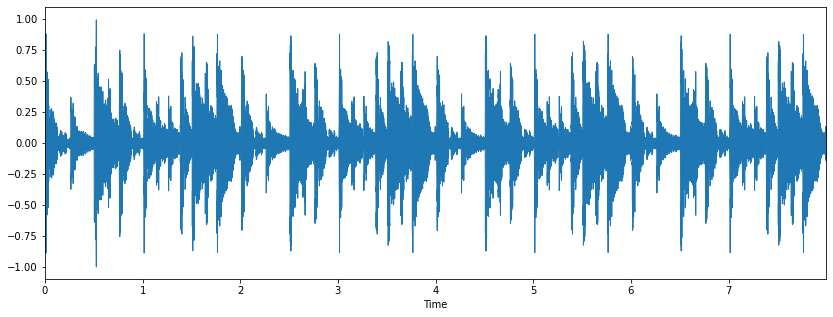

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

## Spectrogram - visual representation of audio
We'll plot the time on the x-axis, frequencies on the y-axis, and use the color to represent the amplitude of various frequencies.

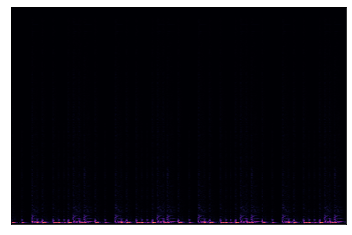

In [11]:
sg0 = librosa.stft(y)
sg_mag, sg_phase = librosa.magphase(sg0)
librosa.display.specshow(sg_mag);

### the mel-scale instead of raw frequency

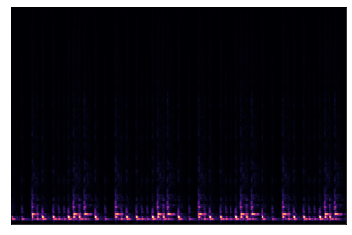

In [12]:
sg1 = librosa.feature.melspectrogram(S=sg_mag, sr=sr)
librosa.display.specshow(sg1);

### the decibel scale, and labels the x & y axes

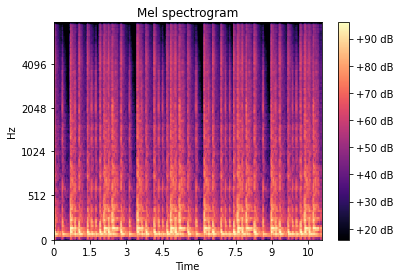

In [14]:
import numpy as np

sg2 = librosa.amplitude_to_db(sg1, ref=np.min)
librosa.display.specshow(sg2, sr=16000, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram');

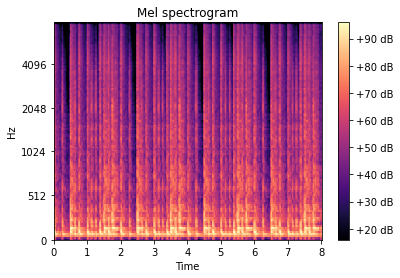

In [22]:
sg3 = librosa.amplitude_to_db(sg1, ref=np.min)
librosa.display.specshow(sg2, sr=sr, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram');

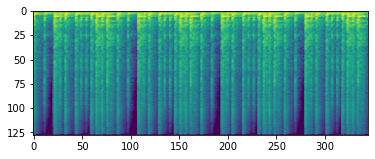

In [17]:
plt.imshow(sg2)

##It looks inverted because the y-axis is inverted. Also, the ticks on the y-axis now represent mel frequencies, and the ticks on the x-asis represent the actual sample length

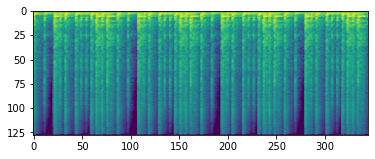

In [23]:
plt.imshow(sg3)

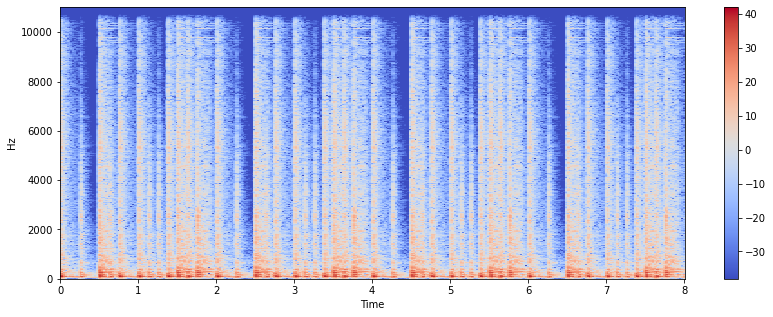

In [25]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

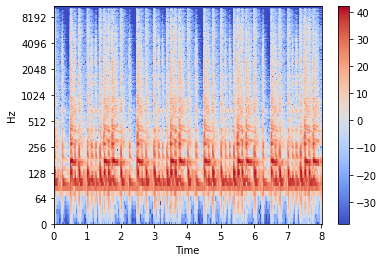

In [26]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()




### Mel-Frequency Cepstral Coefficients(MFCCs)

(20, 345)


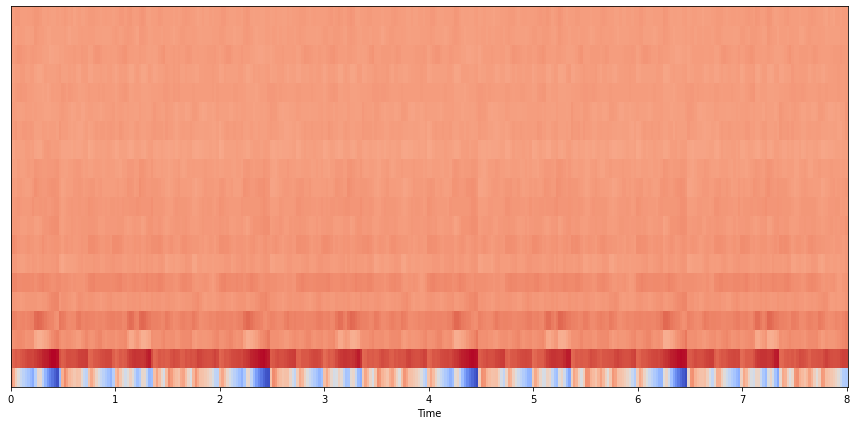

In [30]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## note https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
 ##   https://www.kaggle.com/aakashns/audio-processing-for-machine-learning#Spectrogram---visual-representation-of-audio